# **1<sup>st</sup>: Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from sklearn.preprocessing import MultiLabelBinarizer

### **Helping Functions**

In [2]:
# Functions that Takes the excel sheet to make all the columns to be integer numbers only
# ---------------------------------------------------------------------------------------

def round_floats_to_ints(input_dataframe):
    # Round all float columns to integers
    df = input_dataframe.apply(lambda x: x.round() if x.dtype == 'float64' else x)

    return df

In [3]:
# Function to Find the Empty Cells
# --------------------------------

def find_empty_cells(df):

    # Dictionary to store the indices of empty cells for each column
    empty_cells = {}

    # Iterate through each column in the DataFrame
    for col in df.columns:
        # Find indices of empty cells in the current column
        empty_indices = df[df[col].isna()].index.tolist()
        # Add the empty cell indices to the dictionary
        if len(empty_indices) != 0:
            empty_cells[col] = len(empty_indices)

    return empty_cells

# **2<sup>nd</sup>: Data Importing & Description**

In [4]:
# df = pd.read_csv('https://raw.githubusercontent.com/MohamedMandour10/Datasets/main/cleaned_data.csv')
df = pd.read_csv('https://raw.githubusercontent.com/MohamedMandour10/Datasets/main/cleaned_output(Sheet1).csv')
df.rename(columns={'Pass \nPCP\nPCP + PharmD\nPCP + Consultant\nUrgent PCP': 'target'}, inplace=True)
# df = df.drop('Case NO', axis=1)

In [5]:
df.head(3)

,Case NO,Age,Secondary Diseases,LDL,Statin Used,Statin \nMedications,Statin Dose,Current Smoker,Gender,BMI,...,target,Heart Rate,Gold Stage,Gold Group,COPD Pills,Asthma Controlled,Exacerbation Risk,SABA Class,SAMA Class,ICS Dose
0,1,75,"Ischemic Stroke, Hyperlipidemia",178.814642,yes,Fluvastatin,41.610403,False,male,41.045968,...,PCP,111,4,Unknown,yes,poorly controlled,high,yes,no,high Dose
1,2,63,"Ischemic Stroke, Coronary Artery Disease",115.881590,yes,Fluvastatin,50.222206,False,female,25.782128,...,Pass,76,1,A,no,well controlled,low,yes,yes,Medium Dose
2,3,49,CKD,141.582013,yes,Fluvastatin,71.559289,False,male,33.988908,...,PCP + Pharm D,54,1,B,no,well controlled,high,no,yes,Medium Dose


In [6]:
df.describe()

,Case NO,Age,LDL,Statin Dose,BMI,WC,HDL,Cholesterol,CrCl Test,TSH,Systolic BP,Diastolic BP,Postprandial,Preprandial,Number of Meds,Heart Rate
count,903.000000,903.000000,903.000000,436.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000,903.000000
mean,452.000000,62.086379,122.215622,34.187357,29.482533,39.932192,59.085271,233.660441,61.285770,14.489029,153.961240,82.772979,528.502769,254.572536,2.052049,88.676633
std,260.817944,15.802806,42.997542,27.560769,6.931617,11.479512,23.683061,91.377053,34.235747,16.890580,19.047602,19.245135,170.427601,118.241649,1.561934,18.991934
min,1.000000,35.000000,50.000000,1.000000,15.427108,20.000465,20.000000,80.016905,0.190000,0.041010,100.000000,51.000000,113.000000,80.000000,0.000000,30.000000
25%,226.500000,49.000000,84.368093,10.594401,24.579096,30.401255,39.000000,154.227870,32.430000,5.242811,143.000000,69.000000,409.000000,153.500000,1.000000,74.000000
50%,452.000000,61.000000,121.779256,22.854758,27.136006,39.912500,58.000000,232.209610,61.790000,10.703759,158.000000,78.000000,539.000000,243.000000,2.000000,88.000000
75%,677.500000,76.000000,158.413229,49.761620,32.667800,49.647449,79.000000,309.823552,90.455000,16.359633,169.000000,89.000000,675.000000,346.000000,3.000000,104.000000
max,903.000000,90.000000,200.000000,89.923778,49.762629,59.912834,100.000000,399.841661,119.950000,97.648786,180.000000,160.000000,800.000000,500.000000,6.000000,128.000000


# **3<sup>rd</sup>: Data Preprocessing**

### **3.1. Removing Duplicates**

In [7]:
df = df.drop_duplicates()

### **3.2. Applying Logical Operations on Vitals**

In [8]:
# Removing Rows with Diastolic More than Systolic
df = df[df['Systolic BP'] >= df['Diastolic BP']]

In [9]:
# Keep Only Cells that have Systolic is More than Diastolic with Min 20 Points
df = df[df['Systolic BP'] >= df['Diastolic BP'] + 20]

In [10]:
# Removing Rows with Preprandial More than Postprandial
df = df[df['Postprandial'] >= df['Preprandial']]

In [11]:
# Keep Only Cells that have Postprandial is More than Preprandial with Min 20 Points
df = df[df['Postprandial'] >= df['Preprandial'] + 20]

### **3.3. Rounding the Dataframe Cells**

In [12]:
df = round_floats_to_ints(df)

### **3.4. Filling in the Empty Cells**

In [13]:
empty_cells = find_empty_cells(df)
empty_cells

{'Secondary Diseases': 165,
 'Statin \nMedications': 467,
 'Statin Dose': 467,
 'ICS Dose': 25}

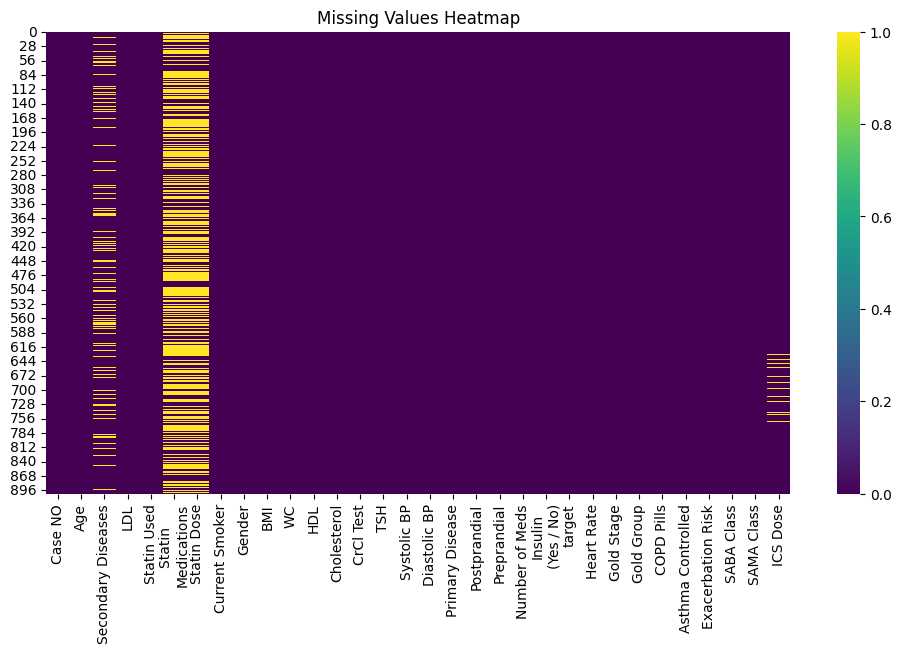

In [14]:
# Visualize missing values
plt.figure(figsize=(12, 6))
sns.heatmap(df.isnull(), cbar=True, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [15]:
# Calculate total number of rows in the DataFrame
total_rows = df.shape[0]

# Calculate percentage of missing values for each column
missing_percentages = {column: (count / total_rows) * 100 for column, count in empty_cells.items()}

# Create subplots: one pie chart per feature
fig = make_subplots(rows=1, cols=len(missing_percentages), subplot_titles=list(missing_percentages.keys()), specs=[[{'type':'domain'}] * len(missing_percentages)])

# Add pie charts to the subplots
for i, (feature, percentage) in enumerate(missing_percentages.items()):
    fig.add_trace(go.Pie(labels=['Missing', 'Not Missing'],
                         values=[percentage, 100 - percentage],
                         name=feature,
                         textinfo='label+percent'), 1, i + 1)

# Update layout
fig.update_layout(title_text='Percentage of Missing Values per Column', title_x=0.5)

# Show the plot
fig.show()


In [16]:
df.rename(columns={'Statin \nMedications': 'Statin Medications'}, inplace=True)
print(df.columns)

Index(['Case NO', 'Age', 'Secondary Diseases', 'LDL', 'Statin Used',
       'Statin Medications', 'Statin Dose', 'Current Smoker', 'Gender', 'BMI',
       'WC', 'HDL', 'Cholesterol', 'CrCl Test', 'TSH', 'Systolic BP',
       'Diastolic BP', 'Primary Disease', 'Postprandial', 'Preprandial',
       'Number of Meds', 'Insulin\n(Yes / No)', 'target', 'Heart Rate',
       'Gold Stage', 'Gold Group', 'COPD Pills', 'Asthma Controlled',
       'Exacerbation Risk', 'SABA Class', 'SAMA Class', 'ICS Dose'],
      dtype='object')


### 3.5. Imputation of data
From the observations made when plotting the percentages of missing values, it was found that both Statin Medications and Statin Dose have the same amount of missing values at `48.3%`. After consulting with the doctor, it was confirmed that every patient who takes statins has **hyperlipidemia** as their primary condition. Therefore, the missing values should be imputed with `No Statin` in case of **Statin Medications** and `0` in case of **Statin Dose**.

In [17]:
# Filling in the Statin Medication Column
df['Statin Medications'] = df['Statin Medications'].fillna('No Statin Medication')

# Filling in the Statin Dose Column
df['Statin Dose'] = df['Statin Dose'].fillna(0)

# Filling in the ICS Dose Column
df['ICS Dose'] = df['ICS Dose'].fillna('NO ICS')

# Filling in the ICS Dose Column
df['Secondary Diseases'] = df['Secondary Diseases'].fillna('No Secondary Diseases')

In [18]:
empty_cells = find_empty_cells(df)
empty_cells

{}

# **4<sup>th</sup>: Data Analysis & Visualization**

In [19]:
df_cleaned_data = df

In [20]:
df_cleaned_data.head(2)

,Case NO,Age,Secondary Diseases,LDL,Statin Used,Statin Medications,Statin Dose,Current Smoker,Gender,BMI,...,target,Heart Rate,Gold Stage,Gold Group,COPD Pills,Asthma Controlled,Exacerbation Risk,SABA Class,SAMA Class,ICS Dose
0,1,75,"Ischemic Stroke, Hyperlipidemia",179.0,yes,Fluvastatin,42.0,False,male,41.0,...,PCP,111,4,Unknown,yes,poorly controlled,high,yes,no,high Dose
1,2,63,"Ischemic Stroke, Coronary Artery Disease",116.0,yes,Fluvastatin,50.0,False,female,26.0,...,Pass,76,1,A,no,well controlled,low,yes,yes,Medium Dose


### **4.1. One-Hot-Label Encoding**

In [21]:
# Split the diseases into a list
df_cleaned_data['Secondary Diseases'] = df_cleaned_data['Secondary Diseases'].apply(lambda x: x.split(', ') if isinstance(x, str) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Fit and transform the data
one_hot_encoded = mlb.fit_transform(df_cleaned_data['Secondary Diseases'])

# Create a DataFrame with the one-hot encoded data
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the one-hot encoded DataFrame with the original DataFrame
df_cleaned_data = pd.concat([df_cleaned_data, one_hot_encoded_df], axis=1)

# Drop the original 'Secondary Diseases' column if not needed
df_cleaned_data.drop('Secondary Diseases', axis=1, inplace=True)

In [22]:
df_cleaned_data.shape

(903, 46)

In [23]:
df_cleaned_data.head(2)

,Case NO,Age,LDL,Statin Used,Statin Medications,Statin Dose,Current Smoker,Gender,BMI,WC,...,Coronary Artery Disease,Diabetes,Hyperlipidemia,Hypertension,Ischemic Stroke,No Secondary Diseases,Obesity,Obstructive Sleep Apnea,Peripheral Artery Disease,Primary Hypothyroidism
0,1,75,179.0,yes,Fluvastatin,42.0,False,male,41.0,38.0,...,0,0,1,0,1,0,0,0,0,0
1,2,63,116.0,yes,Fluvastatin,50.0,False,female,26.0,23.0,...,1,0,0,0,1,0,0,0,0,0


### **4.2. Numerical Data Visualization**

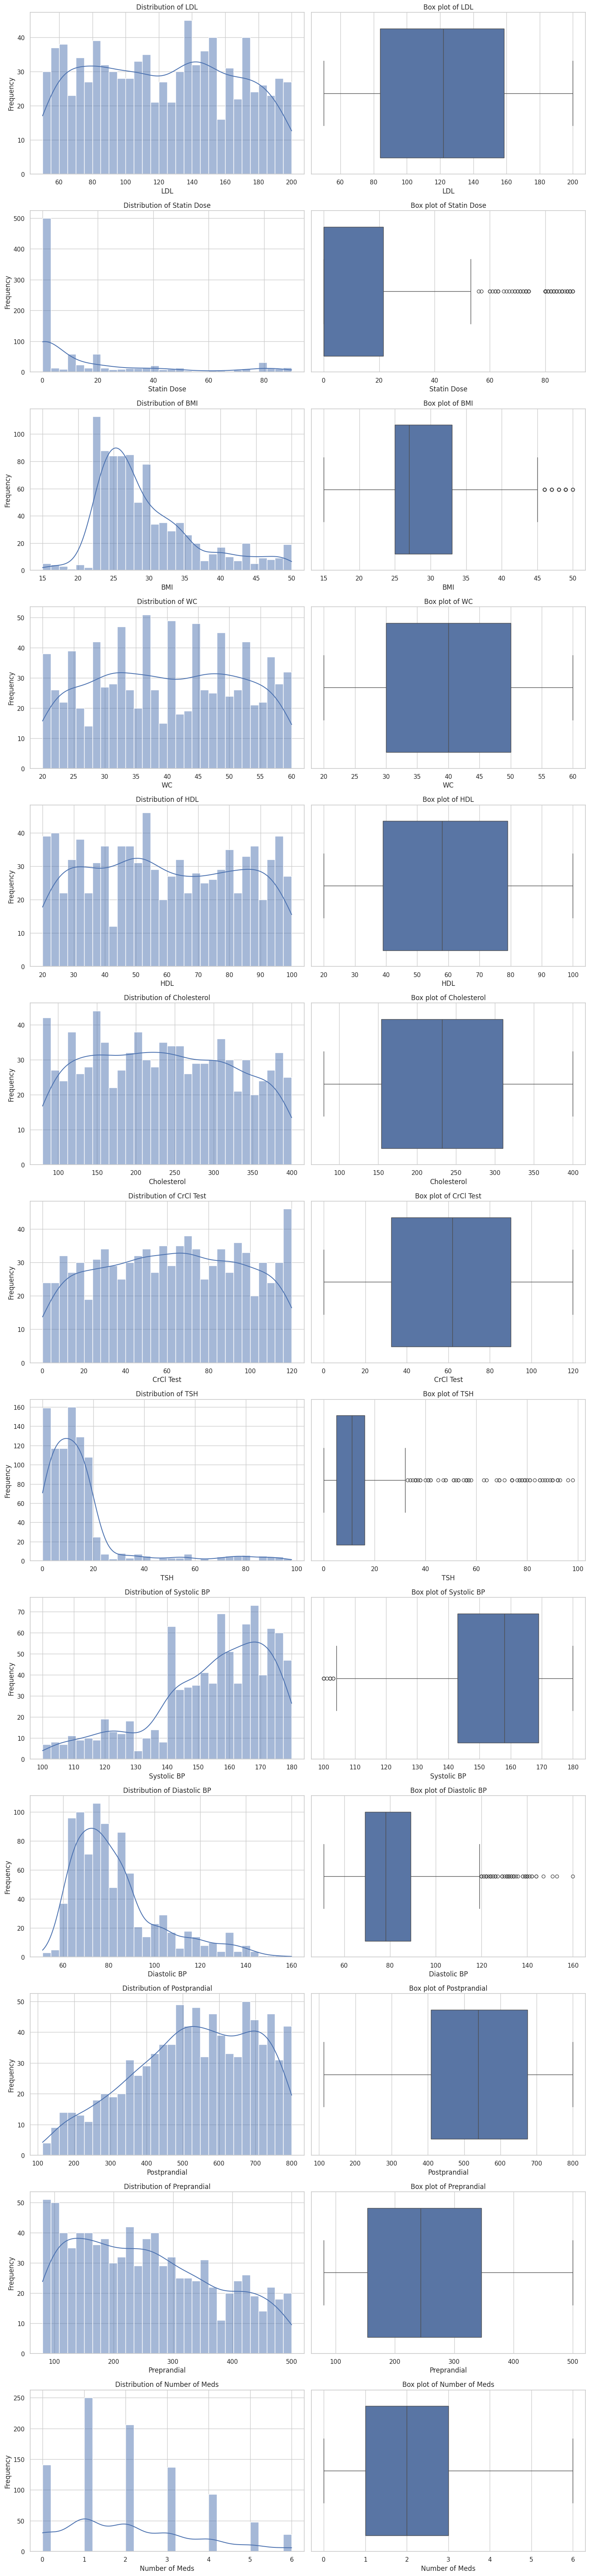

In [24]:
# Set up the plotting area
sns.set(style="whitegrid")

# Filter numerical columns excluding the first column
num_columns = df_cleaned_data.select_dtypes(include='number').columns[1:15]

# Check if any columns are left to plot
if len(num_columns) < 2:
    print("No numerical columns to plot.")
else:
    # Create a subplot for numerical distributions and box plots
    num_plots = len(num_columns) - 1
    fig, axs = plt.subplots(num_plots, 2, figsize=(15, 5 * num_plots))

    for i, column in enumerate(num_columns[1:]):
        # Distribution plot
        sns.histplot(df_cleaned_data[column], kde=True, bins=30, ax=axs[i, 0])
        axs[i, 0].set_title(f'Distribution of {column}')
        axs[i, 0].set_xlabel(column)
        axs[i, 0].set_ylabel('Frequency')
        # Box plot
        sns.boxplot(x=df_cleaned_data[column], ax=axs[i, 1])
        axs[i, 1].set_title(f'Box plot of {column}')
        axs[i, 1].set_xlabel(column)

    plt.tight_layout()
    plt.show()


### **4.3. Categorical Data Visualization**

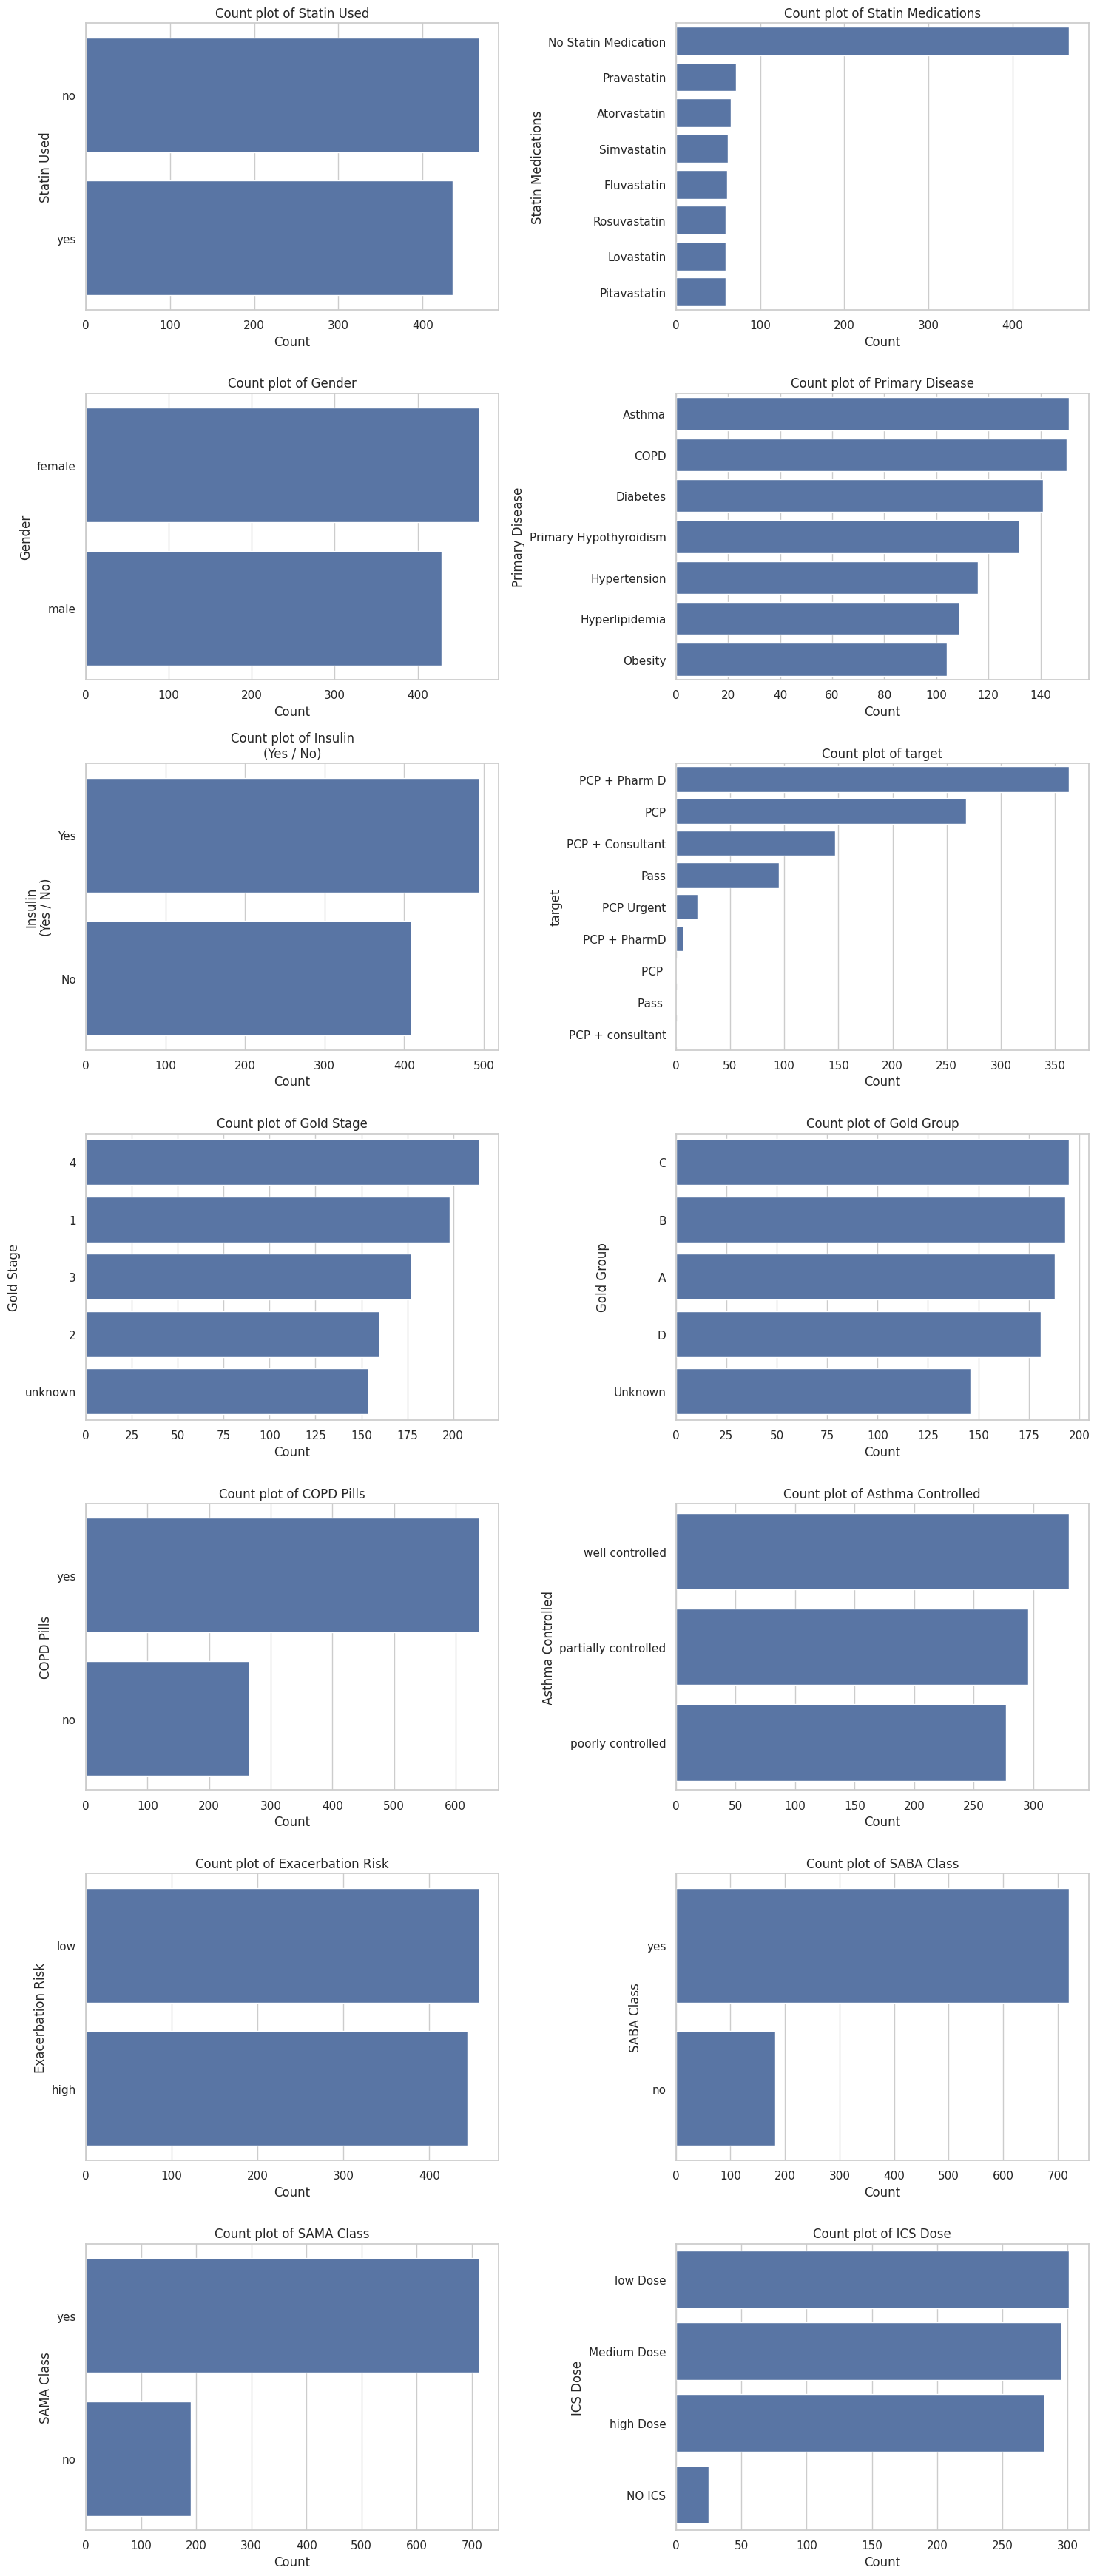

In [25]:
# Create a subplot for categorical count plots
cat_columns = df_cleaned_data.select_dtypes(include='object').columns
cat_plots = len(cat_columns)
fig, axs = plt.subplots((cat_plots + 1) // 2, 2, figsize=(15, 5 * ((cat_plots + 1) // 2)))


for i, column in enumerate(cat_columns):
    row = i // 2
    col = i % 2
    sns.countplot(y=df_cleaned_data[column], order=df_cleaned_data[column].value_counts().index, ax=axs[row, col])
    axs[row, col].set_title(f'Count plot of {column}')
    axs[row, col].set_xlabel('Count')
    axs[row, col].set_ylabel(column)


plt.tight_layout()
plt.show()

### 4.4. Plot Of Categories in target Variable

#### Ensuring Consistency in Naming of target's classes

In [26]:
# Replace "Pass " with "Pass"
df_cleaned_data['target'] = df_cleaned_data['target'].replace('Pass ', 'Pass')

# Replace "??" with "Unknown"
df_cleaned_data['target'] = df_cleaned_data['target'].replace('??', 'Unknown')

df_cleaned_data['target'] = df_cleaned_data['target'].replace('PCP + consultant', 'PCP + Consultant')

df_cleaned_data['target'] = df_cleaned_data['target'].replace('PCP + Pharm D', 'PCP + PharmD')

df_cleaned_data['target'] = df_cleaned_data['target'].replace('PCP ', 'PCP')


In [27]:
# Drop rows where 'target' is 'Unknown'
df_cleaned_data = df_cleaned_data[df_cleaned_data['target'] != 'Unknown']

target
PCP + PharmD        370
PCP                 269
PCP + Consultant    148
Pass                 96
PCP Urgent           20
Name: count, dtype: int64
Number of classes: 5


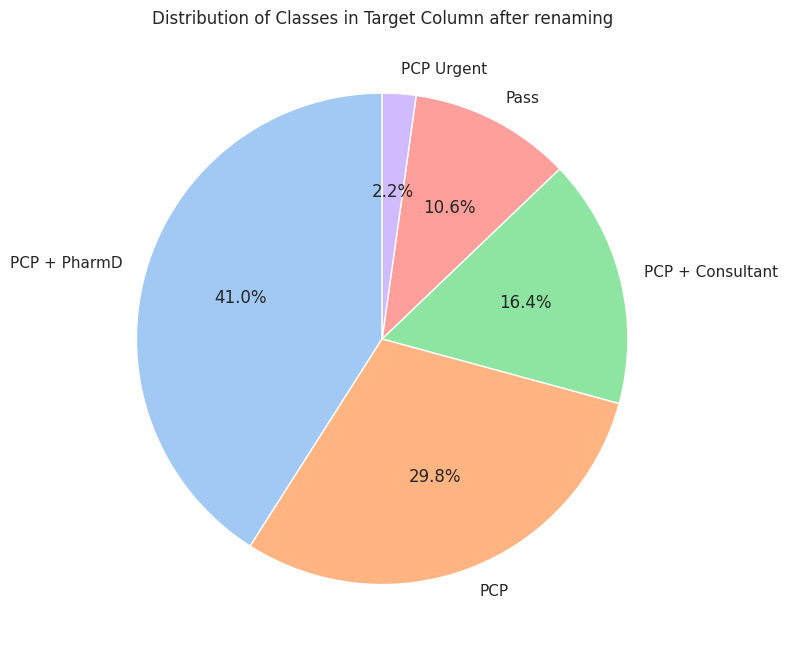

In [28]:
# Set the Seaborn style
sns.set(style="whitegrid")

# Get the count of each class in the target column
class_counts = df_cleaned_data['target'].value_counts()

# Print the class counts
print(class_counts)

# Print the number of unique classes
print("Number of classes:", df_cleaned_data['target'].nunique())

# Plot a pie chart
plt.figure(figsize=(8, 8))
plt.pie(class_counts, labels=class_counts.index, autopct='%1.1f%%', colors=sns.color_palette('pastel'), startangle=90)
plt.title('Distribution of Classes in Target Column after renaming')
plt.tight_layout()
plt.show()

### 4.5. Conditional Probability

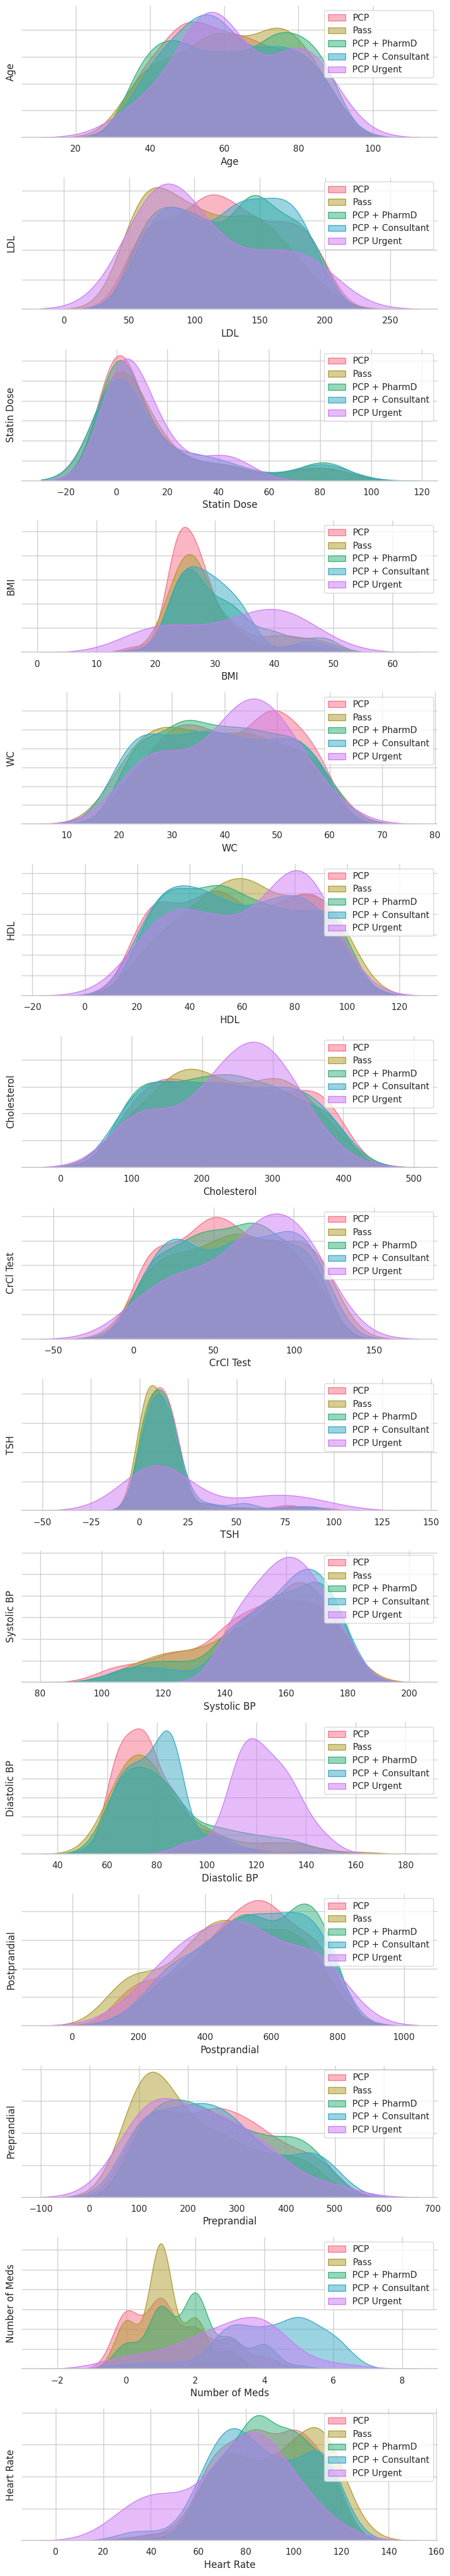

In [29]:
# Define the features to be plotted (excluding the target column)
df_without_target = df_cleaned_data.drop(['target', 'Case NO'], axis=1)
features = df_without_target.select_dtypes(include=['float64', 'int64']).columns
features = features[:15]

# Define the unique labels for the categories
labels = df_cleaned_data['target'].unique()

# Generate a color palette with the same number of colors as there are unique labels
colors = sns.color_palette("husl", len(labels))

# Create a figure with subplots (one subplot for each feature)
fig, axes = plt.subplots(len(features), 1, figsize=(8, len(features) * 3), facecolor='white')

# Set the Seaborn style
sns.set(style="whitegrid")

# Iterate over each feature
for i, feature in enumerate(features):
    # Iterate over all categories
    for category, color in zip(labels, colors):
        data = df_cleaned_data[df_cleaned_data['target'] == category][feature]

        # Check if the data has non-zero variance
        if data.var() != 0:
            # Plot the KDE curve for the current feature and category
            sns.kdeplot(data=data,
                        ax=axes[i],
                        fill=True,
                        color=color,
                        alpha=0.5,
                        label=f'{category}')

    # Customize the subplot
    axes[i].set_yticklabels('')
    axes[i].set_ylabel(feature)
    axes[i].tick_params(axis='y', length=0)

    # Hide the spines (border lines) on the top, right, and left sides
    for direction in ['top', 'right', 'left']:
        axes[i].spines[direction].set_visible(False)

    # Add a legend to the subplot
    axes[i].legend()

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()


## Save Cleaned Data

In [30]:
# Save the cleaned DataFrame to a CSV file
df_cleaned_data.to_csv('cleaned_data.csv', index=False)